In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (30, 20)

In [2]:
v0 = pd.read_csv('divorce_vertices.csv')
v1 = pd.read_csv('state_vertices.csv')
e = pd.read_csv('divorce_edges.csv')

In [3]:
v0

,Legal_Base
0,incompatability
1,cruelty
2,desertion
3,nonsupport
4,alcohol
5,felony
6,impotence
7,insanity
8,separation


In [4]:
v1.head()

,State,Region
0,Alabama,South
1,Alaska,West
2,Arizona,West
3,Arkansas,South
4,California,West


In [5]:
e.head()

,State,Legal_Base
0,Alabama,incompatability
1,Alabama,cruelty
2,Alabama,desertion
3,Alabama,nonsupport
4,Alabama,alcohol


In [6]:
B = nx.Graph()

In [7]:
bases = v0['Legal_Base']
B.add_nodes_from(bases,bipartite=1)

In [8]:
states = v1['State']
B.add_nodes_from(states,bipartite=0)

In [9]:
edges = [zip(e['State'], e['Legal_Base'])]
for edge in edges:
        B.add_edges_from(edge)

In [10]:
nx.is_connected(B)
top_nodes, bottom_nodes = bipartite.sets(B)

In [11]:
list(top_nodes)

['Mississippi',
 'Oklahoma',
 'Wyoming',
 'Minnesota',
 'Illinois',
 'Arkansas',
 'New Mexico',
 'Ohio',
 'Indiana',
 'Maryland',
 'Louisiana',
 'Idaho',
 'Arizona',
 'Iowa',
 'Michigan',
 'Kansas',
 'Utah',
 'Virginia',
 'Oregon',
 'Connecticut',
 'New York',
 'California',
 'Massachusetts',
 'West Virginia',
 'South Carolina',
 'New Hampshire',
 'Vermont',
 'Georgia',
 'North Dakota',
 'Pennsylvania',
 'Florida',
 'Alaska',
 'Kentucky',
 'Hawaii',
 'Nebraska',
 'Missouri',
 'Wisconsin',
 'Alabama',
 'Rhode Island',
 'South Dakota',
 'Colorado',
 'New Jersey',
 'Washington',
 'North Carolina',
 'Tennessee',
 'Montana',
 'Texas',
 'Nevada',
 'Delaware',
 'Maine']

In [12]:
list(bottom_nodes)

['nonsupport',
 'alcohol',
 'felony',
 'cruelty',
 'insanity',
 'incompatability',
 'desertion',
 'separation',
 'impotence']

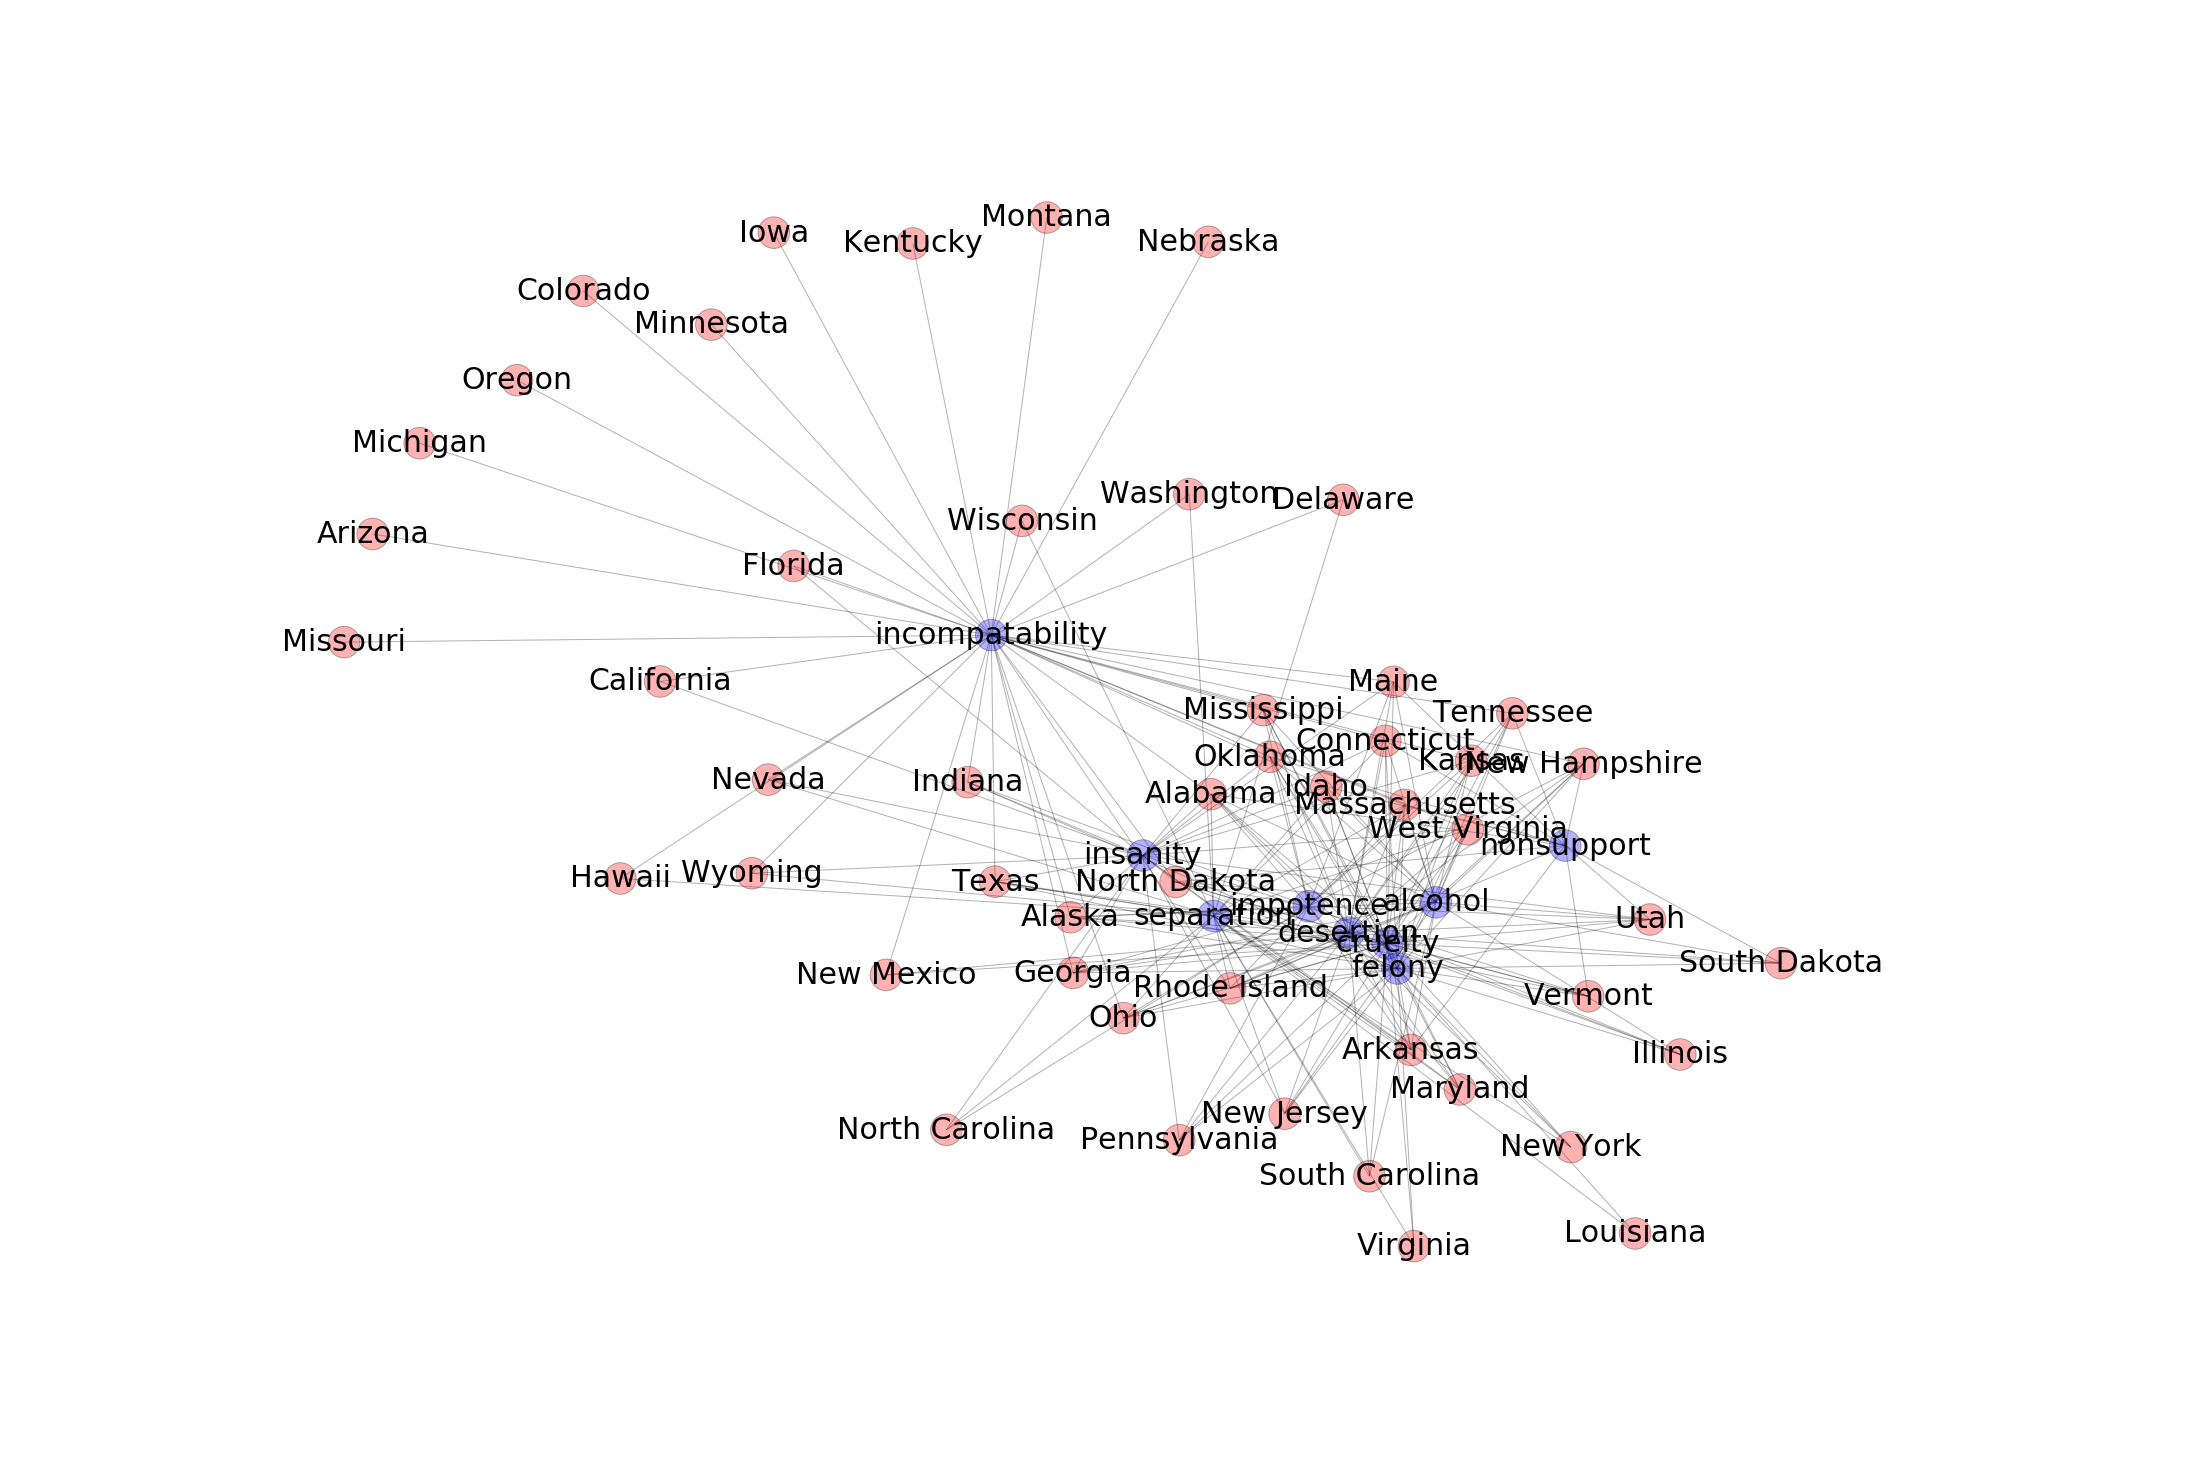

In [13]:
color = []
for n,d in B.nodes(data=True):
    if d['bipartite']==0:
        color.append('r')
    else:
        color.append('b')

nx.draw(B, with_labels=True, node_size = 1000, alpha = .3, node_color=color, font_size=30)
plt.show()

In [15]:
S = nx.bipartite.projected_graph(B, top_nodes)
degrees = sorted(zip(S.degree(top_nodes).values(), S.degree(top_nodes).keys()), reverse=True)
degrees

[(49, 'West Virginia'),
 (49, 'Texas'),
 (49, 'Tennessee'),
 (49, 'Rhode Island'),
 (49, 'Oklahoma'),
 (49, 'Ohio'),
 (49, 'North Dakota'),
 (49, 'New Hampshire'),
 (49, 'Mississippi'),
 (49, 'Massachusetts'),
 (49, 'Kansas'),
 (49, 'Idaho'),
 (49, 'Georgia'),
 (49, 'Connecticut'),
 (49, 'Alaska'),
 (49, 'Alabama'),
 (48, 'Maine'),
 (48, 'Indiana'),
 (47, 'Wyoming'),
 (47, 'New Mexico'),
 (47, 'Nevada'),
 (45, 'Wisconsin'),
 (45, 'Washington'),
 (45, 'Hawaii'),
 (45, 'Delaware'),
 (43, 'Florida'),
 (43, 'California'),
 (39, 'Vermont'),
 (39, 'New Jersey'),
 (39, 'Maryland'),
 (39, 'Arkansas'),
 (37, 'Virginia'),
 (37, 'North Carolina'),
 (37, 'New York'),
 (36, 'South Carolina'),
 (36, 'Oregon'),
 (36, 'Nebraska'),
 (36, 'Montana'),
 (36, 'Missouri'),
 (36, 'Minnesota'),
 (36, 'Michigan'),
 (36, 'Kentucky'),
 (36, 'Iowa'),
 (36, 'Colorado'),
 (36, 'Arizona'),
 (35, 'Utah'),
 (35, 'Pennsylvania'),
 (35, 'Louisiana'),
 (31, 'Illinois'),
 (30, 'South Dakota')]

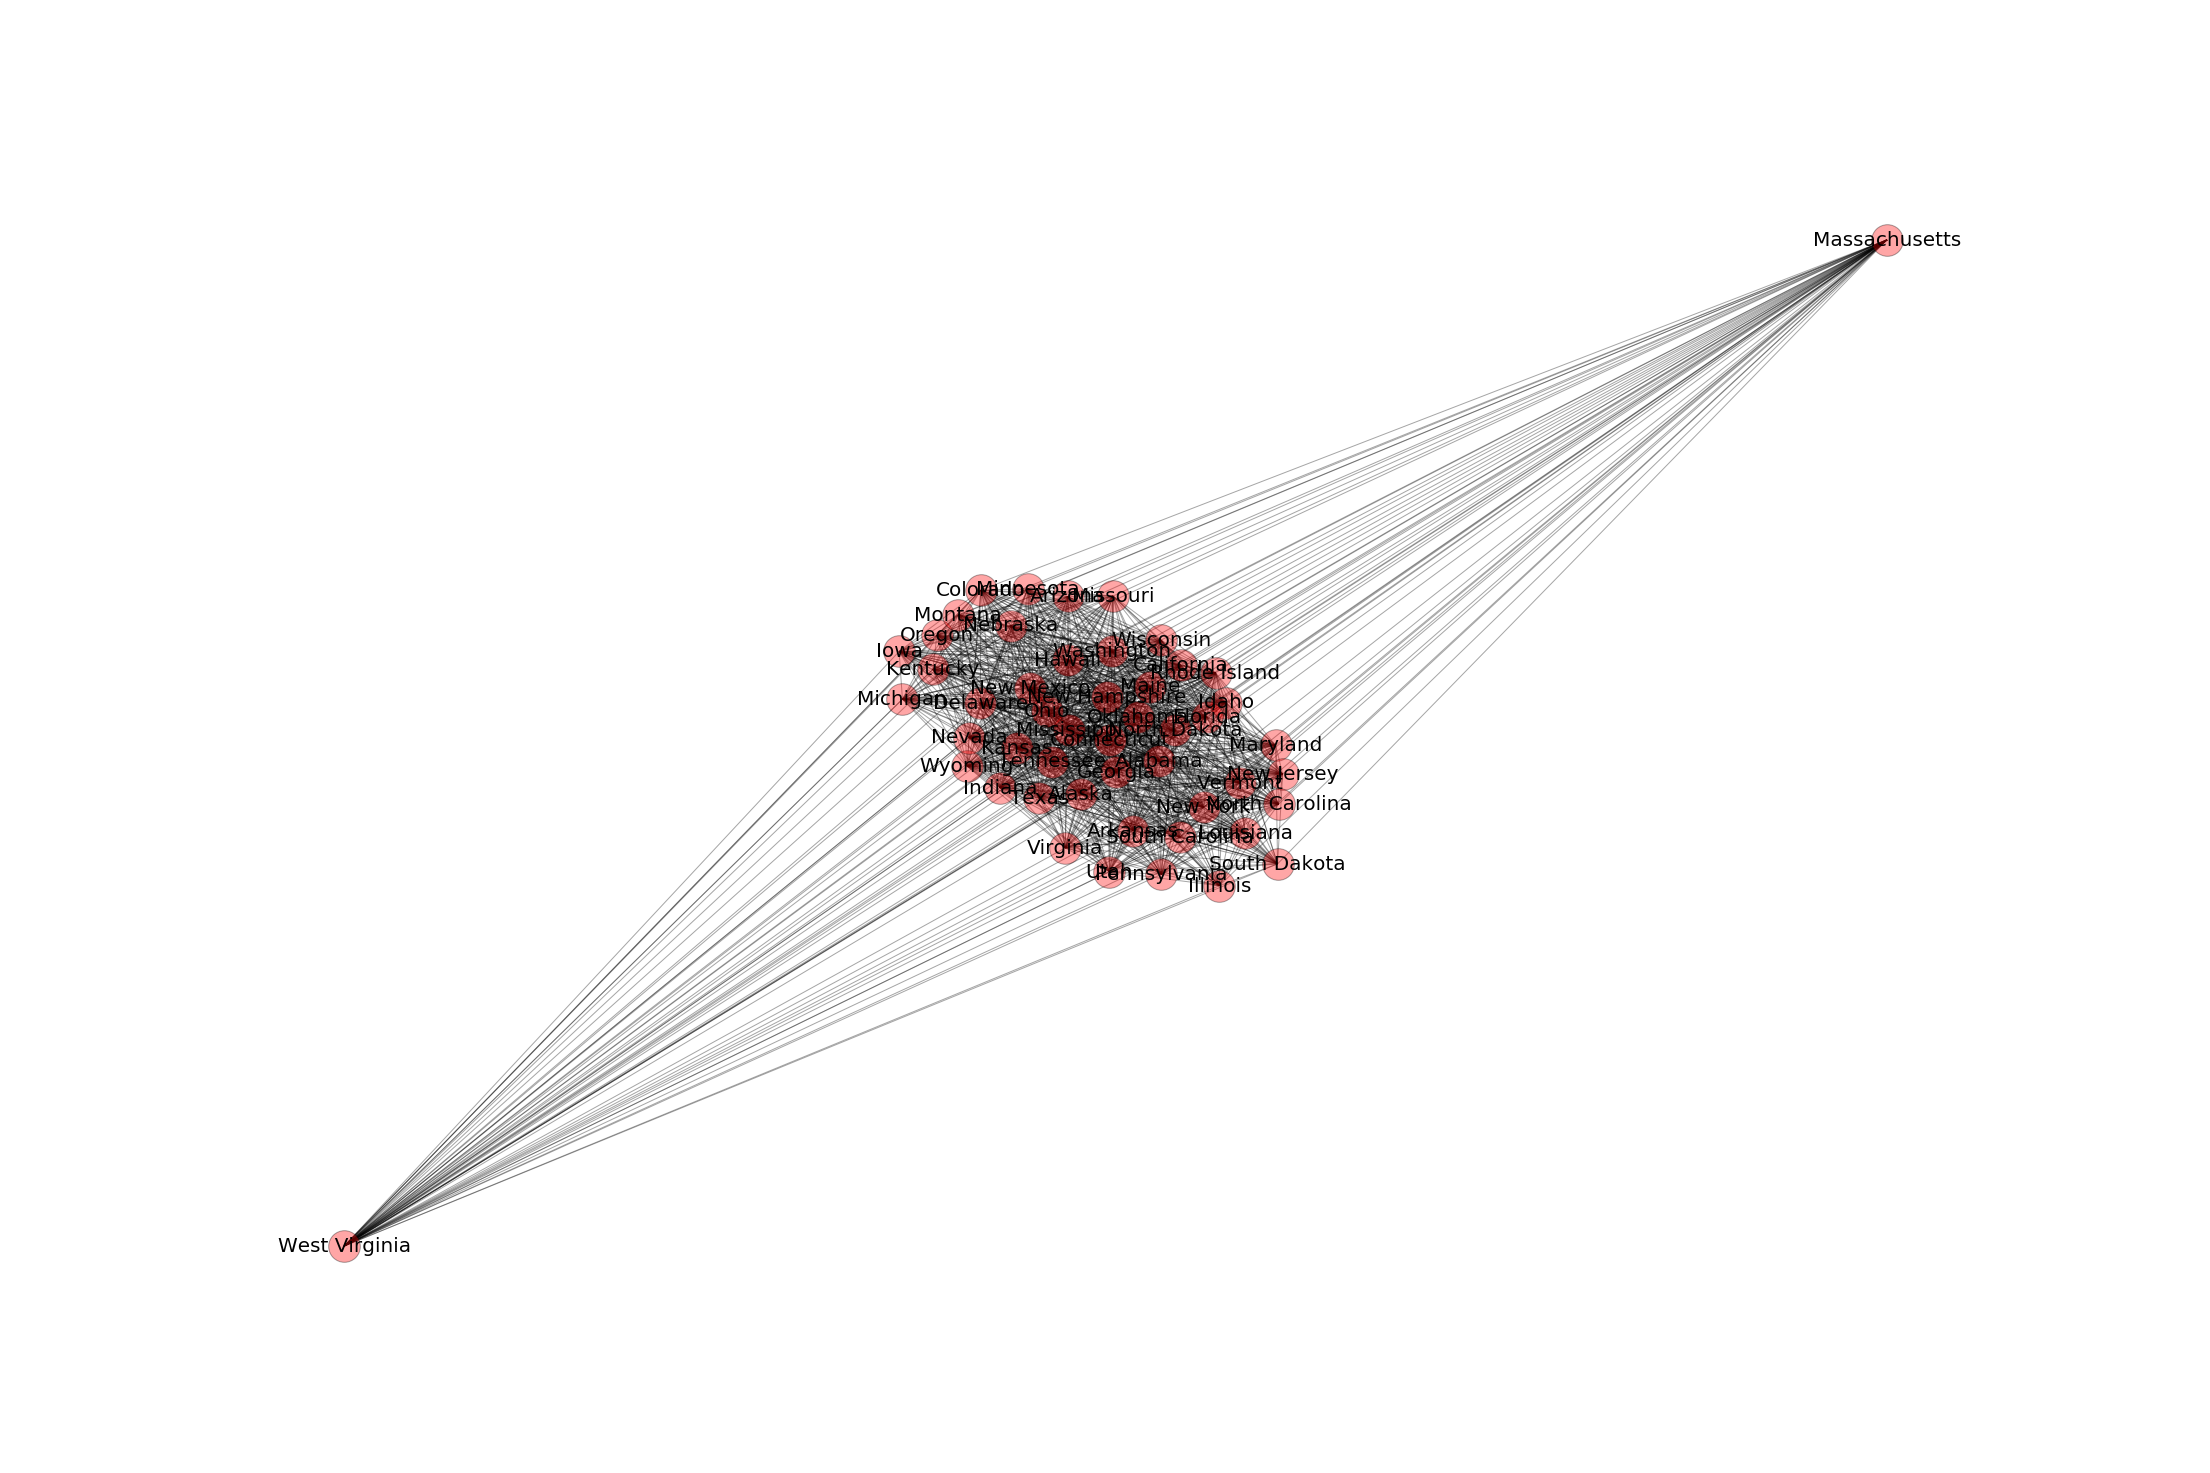

In [17]:
nx.draw(S, with_labels=True, node_size=1000, alpha=.35, font_size=20)

In [20]:
print("Degree Centrality:")
dc = nx.degree_centrality(S)
dc_sorted = dc.items()
dc_sorted.sort(key=lambda x:x[1],reverse=True)
dc_sorted

Degree Centrality:


[('Mississippi', 0.9999999999999999),
 ('Oklahoma', 0.9999999999999999),
 ('Ohio', 0.9999999999999999),
 ('Idaho', 0.9999999999999999),
 ('Kansas', 0.9999999999999999),
 ('Connecticut', 0.9999999999999999),
 ('Massachusetts', 0.9999999999999999),
 ('West Virginia', 0.9999999999999999),
 ('New Hampshire', 0.9999999999999999),
 ('Georgia', 0.9999999999999999),
 ('North Dakota', 0.9999999999999999),
 ('Alaska', 0.9999999999999999),
 ('Alabama', 0.9999999999999999),
 ('Rhode Island', 0.9999999999999999),
 ('Tennessee', 0.9999999999999999),
 ('Texas', 0.9999999999999999),
 ('Indiana', 0.9795918367346939),
 ('Maine', 0.9795918367346939),
 ('Wyoming', 0.9591836734693877),
 ('New Mexico', 0.9591836734693877),
 ('Nevada', 0.9591836734693877),
 ('Hawaii', 0.9183673469387754),
 ('Wisconsin', 0.9183673469387754),
 ('Washington', 0.9183673469387754),
 ('Delaware', 0.9183673469387754),
 ('California', 0.8775510204081632),
 ('Florida', 0.8775510204081632),
 ('Arkansas', 0.7959183673469387),
 ('Maryla

In [21]:
print("Betweenness Centrality:")
bc = nx.betweenness_centrality(S)
bc_sorted = bc.items()
bc_sorted.sort(key=lambda x:x[1],reverse=True)
bc_sorted

Betweenness Centrality:


[('Mississippi', 0.005678152885022749),
 ('Oklahoma', 0.005678152885022749),
 ('Ohio', 0.005678152885022749),
 ('Idaho', 0.005678152885022749),
 ('Kansas', 0.005678152885022749),
 ('Connecticut', 0.005678152885022749),
 ('Massachusetts', 0.005678152885022749),
 ('West Virginia', 0.005678152885022749),
 ('New Hampshire', 0.005678152885022749),
 ('Georgia', 0.005678152885022749),
 ('North Dakota', 0.005678152885022749),
 ('Alaska', 0.005678152885022749),
 ('Alabama', 0.005678152885022749),
 ('Rhode Island', 0.005678152885022749),
 ('Tennessee', 0.005678152885022749),
 ('Texas', 0.005678152885022749),
 ('Indiana', 0.005245363281726231),
 ('Maine', 0.005202445003526465),
 ('New Mexico', 0.0048224484720521005),
 ('Wyoming', 0.004257510972263842),
 ('Nevada', 0.004257510972263842),
 ('Hawaii', 0.0033054997329855238),
 ('Wisconsin', 0.0033054997329855238),
 ('Washington', 0.0033054997329855238),
 ('Delaware', 0.0033054997329855238),
 ('California', 0.0025624488616207038),
 ('Florida', 0.00256

In [22]:
print("Closeness Centrality:")
cc = nx.closeness_centrality(S)
cc_sorted = cc.items()
cc_sorted.sort(key=lambda x:x[1],reverse=True)
cc_sorted

Closeness Centrality:


[('Mississippi', 1.0),
 ('Oklahoma', 1.0),
 ('Ohio', 1.0),
 ('Idaho', 1.0),
 ('Kansas', 1.0),
 ('Connecticut', 1.0),
 ('Massachusetts', 1.0),
 ('West Virginia', 1.0),
 ('New Hampshire', 1.0),
 ('Georgia', 1.0),
 ('North Dakota', 1.0),
 ('Alaska', 1.0),
 ('Alabama', 1.0),
 ('Rhode Island', 1.0),
 ('Tennessee', 1.0),
 ('Texas', 1.0),
 ('Indiana', 0.98),
 ('Maine', 0.98),
 ('Wyoming', 0.9607843137254902),
 ('New Mexico', 0.9607843137254902),
 ('Nevada', 0.9607843137254902),
 ('Hawaii', 0.9245283018867925),
 ('Wisconsin', 0.9245283018867925),
 ('Washington', 0.9245283018867925),
 ('Delaware', 0.9245283018867925),
 ('California', 0.8909090909090909),
 ('Florida', 0.8909090909090909),
 ('Arkansas', 0.8305084745762712),
 ('Maryland', 0.8305084745762712),
 ('Vermont', 0.8305084745762712),
 ('New Jersey', 0.8305084745762712),
 ('Virginia', 0.8032786885245902),
 ('New York', 0.8032786885245902),
 ('North Carolina', 0.8032786885245902),
 ('Minnesota', 0.7903225806451613),
 ('Arizona', 0.790322580

In [37]:
DC = pd.DataFrame(dc.items())
DC.columns = ['State','Degree_Centrality']

In [38]:
BC = pd.DataFrame(bc.items())
BC.columns = ['State','Betweenness_Centrality']

In [39]:
CC = pd.DataFrame(cc.items())
CC.columns = ['State','Closeness_Centrality']

In [40]:
output = pd.merge(v1,DC, on='State')
output = pd.merge(output,BC,on='State')
output = pd.merge(output,CC,on='State')
output.groupby('Region').mean()

,Degree_Centrality,Betweenness_Centrality,Closeness_Centrality
Region,,,
Midwest,0.818027,0.002149,0.859006
Northeast,0.893424,0.003479,0.913564
South,0.880102,0.003153,0.902590
West,0.864992,0.002651,0.889337


In [41]:
output.groupby('Region').sum()


,Degree_Centrality,Betweenness_Centrality,Closeness_Centrality
Region,,,
Midwest,9.816327,0.025784,10.308073
Northeast,8.040816,0.031314,8.222073
South,14.081633,0.050449,14.441435
West,11.244898,0.034460,11.561387
